In [44]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

In [45]:
import pandas as pd
class StringConverter(dict):

    def __contains__(self, item):

        return True

    def __getitem__(self, item):

        return str

    def get(self, default=None):

        return str

def load_data(data_path = "/Users/vishali/Desktop/SPRING 2021/project-ml"):
    csv_path = os.path.join(data_path, "hc11final.csv")
    return pd.read_csv(csv_path, low_memory = False)

In [46]:
new = load_data()

In [47]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83645 entries, 0 to 83644
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hv201                           9857 non-null   float64
 1   ha57                            0 non-null      float64
 2   hc11                            9857 non-null   float64
 3   hv204                           9857 non-null   float64
 4   hv205                           9857 non-null   float64
 5   hv206                           9857 non-null   float64
 6   hv207                           9857 non-null   float64
 7   hv208                           9857 non-null   float64
 8   hv209                           9857 non-null   float64
 9   hv210                           9857 non-null   float64
 10  hv211                           9857 non-null   float64
 11  hv212                           9857 non-null   float64
 12  hv213                           

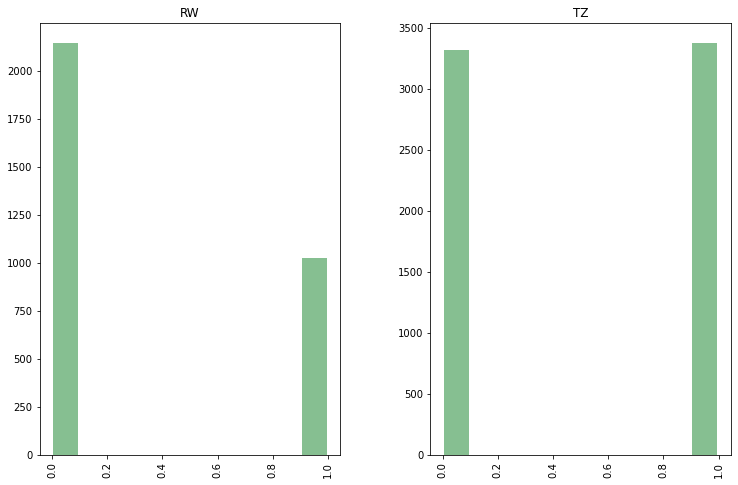

In [48]:
ax = new.hist(column='hc11', by = "DHSCC", grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [49]:
new = new.dropna(subset=['hc11'])

In [50]:
new['hc11'] = pd.Categorical(new.hc11)

In [51]:
y = new['hc11']

In [52]:
y.describe()

count     9857.0
unique       2.0
top          0.0
freq      5459.0
Name: hc11, dtype: float64

In [53]:
X = new.drop(['ha57', 'hc11','DHSCC', 'DHSCLUST'], axis = 1)

In [54]:
X.describe()

,hv201,hv204,hv205,hv206,hv207,hv208,hv209,hv210,hv211,hv212,...,PET_2015,Proximity_to_Water,Rainfall_2015,SMOD_Population_2015,Travel_Times_2015,U5_Population_2005,U5_Population_2015,UN_Population_Count_2015,UN_Population_Density_2015,Wet_Days_2015
count,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,...,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000,9857.000000
mean,3.421629,42.293801,8.596835,0.093639,0.467586,0.068175,0.014203,0.420108,0.063508,0.007609,...,3.425293,55517.106429,1043.129662,0.409151,99.113978,51.410989,67.806841,77550.892585,487.805653,12.641624
std,4.587242,50.077792,10.929888,0.303619,0.498974,0.279542,0.145973,0.500946,0.258430,0.121889,...,0.460958,57009.284133,298.927536,0.776121,91.406992,126.488757,165.068030,99402.835730,1121.713620,2.913997
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.450000,0.000000,373.818182,0.000000,0.000000,0.279527,0.382598,47.931122,0.151325,6.175833
25%,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.958333,16585.734710,853.000000,0.000000,34.861413,7.495979,10.260002,16749.287109,78.112438,10.164166
50%,2.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.550000,35413.540810,1007.000000,0.000000,72.744624,19.474722,26.552991,41639.468750,173.855009,12.008333
75%,2.000000,60.000000,24.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,3.816667,73282.150420,1180.333333,1.000000,133.455764,53.912835,69.655068,118533.296875,494.077231,15.849167
max,14.000000,500.000000,24.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,4.283333,295739.776600,2589.000000,3.000000,628.839142,1574.178850,2028.777204,913433.375000,16723.025670,18.550833


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( solver = 'liblinear', random_state = 42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [57]:
y_pred_LR = lr.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity
FNR = FN / (TN + FN)
print(FNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_test, y_pred_LR, average=None, zero_division=1)

[[838 289]
 [501 344]]
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68      1127
         1.0       0.54      0.41      0.47       845

    accuracy                           0.60      1972
   macro avg       0.58      0.58      0.57      1972
weighted avg       0.59      0.60      0.59      1972

0.3741598207617625


array([0.62584018, 0.54344392])

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [60]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    

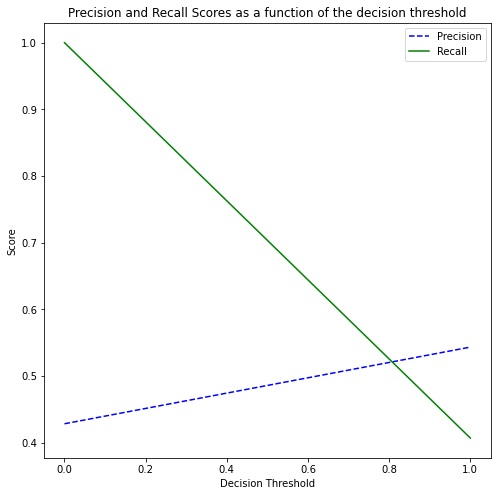

In [61]:
import numpy as np
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_test, y_pred_LR)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [38]:
# define models and parameters
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.354402 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.348111 (0.023075) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.352354 (0.025494) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.347650 (0.025120) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.354402 (0.023526) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.352960 (0.027318) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [40]:
# best c is 0.1, runnning with that value. 
from sklearn.linear_model import LogisticRegression
lr_2 = LogisticRegression(C = 0.1, solver = 'liblinear', random_state = 42)
lr_2.fit(X_train,y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [41]:
# compare this to validation
y_pred_val = lr_2.predict(X_val)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val, average=None, zero_division=1)

[[837 264]
 [571 300]]
              precision    recall  f1-score   support

         0.0       0.59      0.76      0.67      1101
         1.0       0.53      0.34      0.42       871

    accuracy                           0.58      1972
   macro avg       0.56      0.55      0.54      1972
weighted avg       0.57      0.58      0.56      1972

0.4055397727272727


array([0.59446023, 0.53191489])

In [34]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
y_pred_DT = classifier.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_DT)
print(confusion_matrix(y_test, y_pred_DT))
print(classification_report(y_test, y_pred_DT))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_DT))
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_DT, average=None, zero_division=1))


[[729 398]
 [425 420]]
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64      1127
         1.0       0.51      0.50      0.51       845

    accuracy                           0.58      1972
   macro avg       0.57      0.57      0.57      1972
weighted avg       0.58      0.58      0.58      1972

0.6317157712305026
0.5826572008113591
[0.63171577 0.51344743]


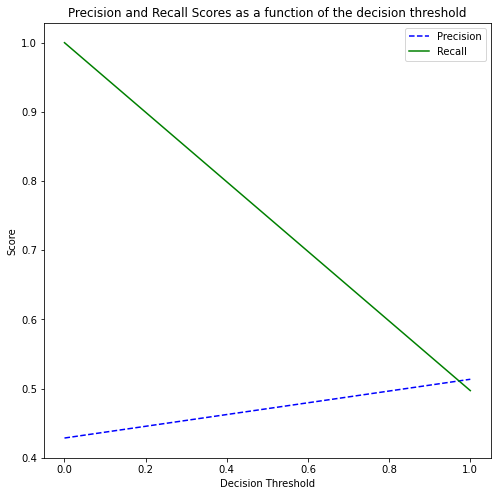

In [89]:
p, r, thresholds = precision_recall_curve(y_test, y_pred_DT)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [ ]:
# Grid search for Decision Trees
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import random
from random import randint
max_depth_range = range(-10,10)
min_samples_leaf_range = range(-10,10)
parameters = {'criterion': ['gini'], 'max_depth': max_depth_range, 'min_samples_leaf': min_samples_leaf_range}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4, cv= 5)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 1, random_state = 42)
classifier2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [52]:
y_pred_val = classifier2.predict(X_val)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)


# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_val)
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val, average=None, zero_division=1)

[[502 599]
 [249 622]]
              precision    recall  f1-score   support

         0.0       0.67      0.46      0.54      1101
         1.0       0.51      0.71      0.59       871

    accuracy                           0.57      1972
   macro avg       0.59      0.59      0.57      1972
weighted avg       0.60      0.57      0.57      1972

0.6684420772303595


array([0.66844208, 0.50941851])

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC(max_iter=100000,random_state=42)
lin_svc.fit(X_train_scaled, y_train)
y_pred = lin_svc.predict(X_test_scaled)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


FNR = FN / (TN + FN)
print(FNR)

# or using accuracy scores
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average=None, zero_division=1))

[[822 305]
 [487 358]]
              precision    recall  f1-score   support

         0.0       0.63      0.73      0.67      1127
         1.0       0.54      0.42      0.47       845

    accuracy                           0.60      1972
   macro avg       0.58      0.58      0.57      1972
weighted avg       0.59      0.60      0.59      1972

0.37203972498090143
0.5983772819472617
[0.62796028 0.53996983]


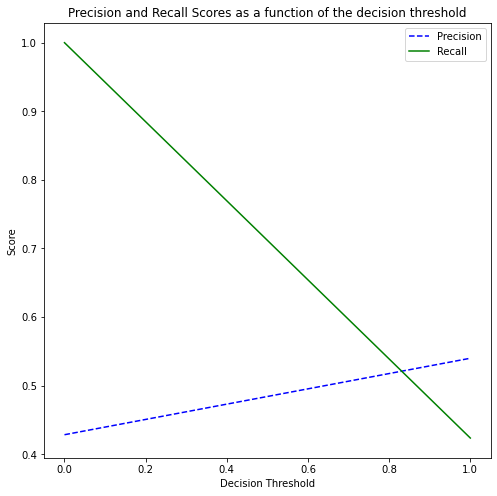

In [65]:
p, r, thresholds = precision_recall_curve(y_test, y_pred)
plot_precision_recall_vs_threshold(p, r, thresholds)

In [43]:
# gridsearch SVM
# example of grid searching key hyperparametres for SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: 

In [95]:
# dimensionality reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


print("Full dimensionality: {}".format(X.shape[1]))
print("Reduced dimensionality: {}".format(X_red.shape[1]))



Full dimensionality: 54
Reduced dimensionality: 2


In [96]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state = 42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [97]:
y_pred_LR = lr.predict(X_test)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# True Negative Rate | Specificity

FNR = FN / (TN + FN)
print(FNR)

# When true positive + false positive == 0, precision returns 0 and raises UndefinedMetricWarning. This behavior can be modified with zero_division.

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[838 289]
 [501 344]]
              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68      1127
         1.0       0.54      0.41      0.47       845

    accuracy                           0.60      1972
   macro avg       0.58      0.58      0.57      1972
weighted avg       0.59      0.60      0.59      1972

0.3741598207617625
0.5983772819472617


In [99]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [100]:
y_pred_DT = classifier.predict(X_test)

In [66]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()    

In [67]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [68]:
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [69]:
y_rf = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_test, y_rf)
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))


TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]



# or using accuracy scores
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_rf)

[[820 307]
 [475 370]]
              precision    recall  f1-score   support

         0.0       0.63      0.73      0.68      1127
         1.0       0.55      0.44      0.49       845

    accuracy                           0.60      1972
   macro avg       0.59      0.58      0.58      1972
weighted avg       0.60      0.60      0.60      1972



0.603448275862069

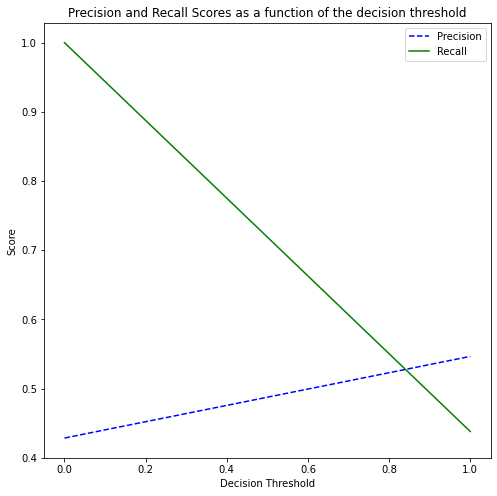

In [70]:
p, r, thresholds = precision_recall_curve(y_test, y_rf)
plot_precision_recall_vs_threshold(p, r, thresholds)